Part 1: Data Processing and Analysis (90 points)
1.	Load the Dataset (10 points)
o	Write a function:
def load_data(filepath: str) -> pd.DataFrame:
	Input:
	filepath: The file path to a CSV or Excel dataset.
	Output:
	A pandas DataFrame containing the loaded data.
	Note: This function must be implemented in a Python file (.py).
o	Use libraries such as numpy or pandas to load the data and return it as a pandas DataFrame


In [32]:
import pandas as pd
import numpy as np

In [33]:
def load_data(filepath: str) -> pd.DataFrame:

    # try to open and read Excel file
    try:
        return pd.read_excel(filepath)
    except Exception as e:
        print(f"Error loading file: {e}")
        return pd.DataFrame()

data = load_data(filepath = 'data/knesset_25.xlsx')
data

,city_name,ballot_code,party_avoda,party_shahar_kalkali_hadash,party_bayit_yehudi,party_agudat_israel,party_daled,party_vavmem,party_shahar_koach_hevrati,party_kama,...,party_tze'irim_bo'arim,party_manhigut_hevratit,party_kol_hasviva_vehachai,party_halev_hayehudi,party_seder_chadash,party_kol,party_beometz_bishvilech,party_kavod_umasoret,party_shas,party_daat_tov_vera
0,אבו גווייעד שבט,3.1,0,0,0,0,4,21,0,0,...,0,0,0,0,0,0,0,0,0,2
1,אבו גווייעד שבט,3.2,1,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1
2,אבו גווייעד שבט,3.3,0,0,0,0,0,12,0,0,...,0,0,0,0,0,0,0,0,2,0
3,אבו גווייעד שבט,3.4,0,0,0,0,0,3,0,0,...,1,0,0,0,0,0,0,0,2,0
4,אבו גוש,1.1,1,0,0,0,171,43,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12540,תקוע,3.0,4,3,66,1,0,1,0,0,...,1,0,0,0,0,0,6,0,12,0
12541,תקוע,4.0,6,3,66,3,0,0,0,0,...,0,0,0,1,0,0,1,0,3,0
12542,תראבין אצאנע שבט,1.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12543,תראבין אצאנעישוב,1.0,1,0,0,0,6,1,0,0,...,0,0,0,0,0,0,1,0,1,0


2.	Group and Aggregate Data (20 points)
o	Write a function:
def group_and_aggregate_data(df: pd.DataFrame, group_by_column: str, agg_func) -> pd.DataFrame:
	Input:
	df: A pandas DataFrame containing the dataset.
	group_by_column: The column to group data by (e.g., 'city name').
	agg_func: The aggregation function to apply to each group (e.g., mean, sum, or count).
	Output:
	A pandas DataFrame with aggregated results.
	Note: This function must be implemented in a Python file (.py).
	Demonstrate this function in a Jupyter Notebook by:
	Loading the election dataset.
	Aggregating it by city name.
	Displaying the total number of votes each party received in each city.

In [38]:
def group_and_aggregate_data(df: pd.DataFrame, group_by_column: str, agg_func) -> pd.DataFrame:
    """
    grouping by and aggregate the data frame
    :param df: DataFrame
    :param group_by_column: String
    :param agg_func: String array
    :return:
    """
    # dropping ballot_code column from the df data frame, grouping by the
    #group_by_column variable and applying agg_func aggregation
    indexedData = data.set_index(['city_name', 'ballot_code'])

    return indexedData.groupby(group_by_column).agg(agg_func)

aggArr = group_and_aggregate_data(data,'city_name',["mean", "sum", "count"])
aggArr


party_avoda           party_shahar_kalkali_hadash            \
                        mean sum count                        mean sum count   
city_name                                                                      
אבו גווייעד שבט     0.250000   1     4                    0.000000   0     4   
אבו גוש             1.555556  14     9                    0.111111   1     9   
אבו סנאן            1.789474  34    19                    0.000000   0    19   
אבו עבדון שבט       0.000000   0     1                    0.000000   0     1   
אבו קורינאת שבט     1.000000   5     5                    0.000000   0     5   
...                      ...  ..   ...                         ...  ..   ...   
תקומה               3.000000   3     1                    2.000000   2     1   
תקוע                6.250000  25     4                    4.500000  18     4   
תראבין אצאנע שבט    0.000000   0     1                    0.000000   0     1   
תראבין אצאנעישוב    1.000000   1     1                    0.000000   0     1   
תרום                5.000000   5     1                    4.000000   4     1   

                 party_bayit_yehudi            party_agudat_israel  ...  \
                               mean  sum count                mean  ...   
city_name                                                           ...   
אבו גווייעד שבט            0.000000    0     4            0.000000  ...   
אבו גוש                    0.111111    1     9            0.333333  ...   
אבו סנאן                   0.157895    3    19            0.000000  ...   
אבו עבדון שבט              0.000000    0     1            0.000000  ...   
אבו קורינאת שבט            0.200000    1     5            0.000000  ...   
...                             ...  ...   ...                 ...  ...   
תקומה                     42.000000   42     1            1.000000  ...   
תקוע                      66.500000  266     4            3.250000  ...   
תראבין אצאנע שבט           0.000000    0     1            0.000000  ...   
תראבין אצאנעישוב           0.000000    0     1            0.000000  ...   
תרום                      17.000000   17     1           12.000000  ...   

                 party_beometz_bishvilech party_kavod_umasoret            \
                                    count                 mean sum count   
city_name                                                                  
אבו גווייעד שבט                         4                  0.0   0     4   
אבו גוש                                 9                  0.0   0     9   
אבו סנאן                               19                  0.0   0    19   
אבו עבדון שבט                           1                  0.0   0     1   
אבו קורינאת שבט                         5                  0.0   0     5   
...                                   ...                  ...  ..   ...   
תקומה                                   1                  0.0   0     1   
תקוע                                    4                  0.0   0     4   
תראבין אצאנע שבט                        1                  0.0   0     1   
תראבין אצאנעישוב                        1                  0.0   0     1   
תרום                                    1                  0.0   0     1   

                 party_shas           party_daat_tov_vera            
                       mean sum count                mean sum count  
city_name                                                            
אבו גווייעד שבט    1.000000   4     4            0.750000   3     4  
אבו גוש            0.444444   4     9            0.000000   0     9  
אבו סנאן           0.631579  12    19            0.052632   1    19  
אבו עבדון שבט      0.000000   0     1            0.000000   0     1  
אבו קורינאת שבט    0.600000   3     5            0.000000   0     5  
...                     ...  ..   ...                 ...  ..   ...  
תקומה             13.000000  13     1            0.000000   0     1  
תקוע               6.750000  27     4            0.000000   0     4  
תראבין אצא

3.	Remove Sparse Columns (10 points)
o	Write a function:
def remove_sparse_columns(df: pd.DataFrame, threshold: int) -> pd.DataFrame:
	Input:
	df: A pandas DataFrame.
	threshold: The minimum total sum for a column to be retained in the DataFrame.
	Output:
	A pandas DataFrame with sparse columns removed.
	Note: This function must be implemented in a Python file (.py).
o	Demonstrate this function in a Jupyter Notebook by removing columns representing parties that received fewer votes than a specified threshold.


#z = data[data.sum()[group_and_aggregate_data(data, "city_name", sum) > 150].index]
summed = group_and_aggregate_data(data, "city_name", 'sum') 
z = summed[summed > 10]


In [42]:
def remove_sparse_columns(df: pd.DataFrame, threshold: int) -> pd.DataFrame:
    """
    remove sparse columns from dataframe
    :param df: dataframe
    :param threshold: integer
    :return: dataframe
    """
    # index the table by city name and ballot code
    if 'ballot_code' in df.columns:
        indexed_data = df.set_index(['city_name', 'ballot_code'])
    else:
        indexed_data = df.set_index(['city_name'])
    # calculate the sum of each column
    column_totals = indexed_data.sum()

    return indexed_data[list(column_totals[column_totals > threshold].index)]

remove_sparse_columns(df= data, threshold=10000)

party_avoda  party_shahar_kalkali_hadash  \
city_name        ballot_code                                             
אבו גווייעד שבט  3.1                    0                            0   
                 3.2                    1                            0   
                 3.3                    0                            0   
                 3.4                    0                            0   
אבו גוש          1.1                    1                            0   
...                                   ...                          ...   
תקוע             3.0                    4                            3   
                 4.0                    6                            3   
תראבין אצאנע שבט 1.0                    0                            0   
תראבין אצאנעישוב 1.0                    1                            0   
תרום             1.0                    5                            4   

                              party_bayit_yehudi  party_agudat_israel  \
city_name        ballot_code                                            
אבו גווייעד שבט  3.1                           0                    0   
                 3.2                           0                    0   
                 3.3                           0                    0   
                 3.4                           0                    0   
אבו גוש          1.1                           0                    0   
...                                          ...                  ...   
תקוע             3.0                          66                    1   
                 4.0                          66                    3   
תראבין אצאנע שבט 1.0                           0                    0   
תראבין אצאנעישוב 1.0                           0                    0   
תרום             1.0                          17                   12   

                              party_daled  party_vavmem  party_tet  \
city_name        ballot_code                                         
אבו גווייעד שבט  3.1                    4            21          0   
                 3.2                    0             2          0   
                 3.3                    0            12          0   
                 3.4                    0             3          0   
אבו גוש          1.1                  171            43          1   
...                                   ...           ...        ...   
תקוע             3.0                    0             1        155   
                 4.0                    0             0        206   
תראבין אצאנע שבט 1.0                    0             1          0   
תראבין אצאנעישוב 1.0                    6             1          0   
תרום             1.0                    0             0        130   

                              party_hakalkalit_hahadasha  party_kahol_lavan  \
city_name        ballot_code                                                  
אבו גווייעד שבט  3.1                                   0                  1   
                 3.2                                   0                  0   
                 3.3                                   0                  3   
                 3.4                                   0                  1   
אבו גוש          1.1                                   0                  0   
...                                                  ...                ...   
תקוע             3.0                                   0                 19   
                 4.0                                   1                 19   
תראבין אצאנע שבט 1.0                                   0                  0   
תראבין אצאנעישוב 1.0                                   0                  0   
תרום             1.0                                   1                 46   

                              party_israel_beitenu  party_likud  party_meretz  \
city_name        ballot_code                                                    
אבו גווייעד שבט 

Dimensionality Reduction Function

Parameters:
    df (pd.DataFrame): Input DataFrame containing data for dimensionality reduction
    num_components (int): Number of principal components to retain
    meta_columns (list[str]): List of metadata columns to preserve unchanged

Returns:
    pd.DataFrame: DataFrame with reduced dimensions and original metadata columns


In [36]:
def dimensionality_reduction(df: pd.DataFrame, num_components: int, meta_columns: list[str]) -> pd.DataFrame:
    #Saving meta data
    meta_data = df[meta_columns]

    #removing meta collums
    non_meta_data = df.drop(columns = meta_columns)

    #Calculate the mean of each column
    mean = non_meta_data.mean()

    #Normalize the data
    normalized_non_meta_data = non_meta_data - mean

    #Find covariance matrix
    cov_matrix = np.cov(normalized_non_meta_data, rowvar=False)

    #Calculate the eigenvalues and eigenvectors
    eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

    #Sort eigen values and save list of orginal indexes
    sorted_indices = np.argsort(eigen_vals)[::-1]

    #Sort vects by sorted_indices
    sorted_eigen_vecs = eigen_vecs[:, sorted_indices]

    #Take only num_components columns
    principal_components = sorted_eigen_vecs[:, :num_components]

    #Project the data onto the principal components
    #matrix multiplication between a pandas.DataFrame (normalized_non_meta_data) and a NumPy ndarray (principal_components) NxM dot Mxnum_components
    reduced_data = normalized_non_meta_data@principal_components

    labled_columns = {i:f'PC{i+1}' for i in range(num_components)}
    reduced_data.rename(columns=labled_columns, inplace=True)
    
    #Combine reduced data and meta data
    result_df = pd.concat([meta_data, reduced_data], axis=1)

    return result_df

dimensionality_reduction(data, 2, ['city_name', 'ballot_code'])


,city_name,ballot_code,PC1,PC2
0,אבו גווייעד שבט,3.1,106.105293,97.442477
1,אבו גווייעד שבט,3.2,94.597143,79.640944
2,אבו גווייעד שבט,3.3,112.101099,102.923479
3,אבו גווייעד שבט,3.4,96.019202,80.739182
4,אבו גוש,1.1,128.880482,133.343458
...,...,...,...,...
12540,תקוע,3.0,-0.605860,-33.620839
12541,תקוע,4.0,-10.730545,-43.546347
12542,תראבין אצאנע שבט,1.0,68.260583,52.610869
12543,תראבין אצאנעישוב,1.0,22.747345,26.056273


5.	Visualize the Reduced Data (20 points)
o	Compare Cities:
	Aggregate the data so that each row represents a city, and each column represents the total number of votes obtained by each party.
	Remove the data for parties that received less than 1000 total votes.
	Create a scatter plot of the reduced data (for num_components = 2) to visualize dimensionality reduction.
	Estimate the number of clusters visually.
o	Compare Parties:
	Transpose the city-wide data so that each row represents a party, and each column represents a city.
	Remove data for cities with fewer than 1000 total votes.
	Create a scatter plot of the reduced data (for num_components = 2) to visualize dimensionality reduction.
	Estimate the number of clusters visually.
	Note: Instead of using matplotlib, consider using Plotly for interactive visualizations. Research “Plotly hover” to add tooltips for identifying specific cities or parties. You may also explore creating 3D visualizations to better understand data relationships.


Text(0.5, 1.0, 'Reduced Data (PC1,PC2)')

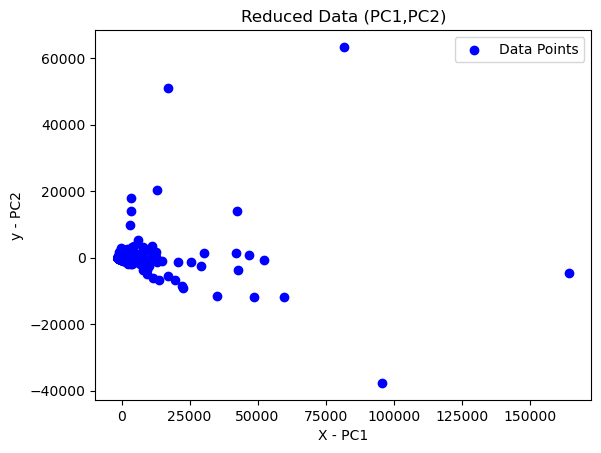

In [66]:
import matplotlib.pyplot as plt
#indexedData = data.set_index(['city_name', 'ballot_code'])
aggregatedData = group_and_aggregate_data(data, 'city_name', ['sum'])
aggregatedData.reset_index(inplace=True)
filteredData = remove_sparse_columns(aggregatedData, threshold=1000)
reducedData = dimensionality_reduction(filteredData, 2, [])


plt.scatter(reducedData.iloc[:,0], reducedData.iloc[:,1], color="blue", label="Data Points")

plt.xlabel("X - PC1")
plt.ylabel("y - PC2")
plt.legend()
plt.title("Reduced Data (PC1,PC2)")

	Estimate the number of clusters visually. = 1